In [1]:
#GROUP NO 6 : 
#PC 34 - Siddhant Deshpande
#PC 35 - Shriya Padhi
#PC 36 - Arnav Sinha
#PC 37 - Atharv Ganla

In [1]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

In [3]:
path = 'pokemon_git.csv'
data = pd.read_csv(path)

FileNotFoundError: [Errno 2] No such file or directory: 'pokemon_git.csv'

In [ ]:
clust = data.drop('Name',axis='columns')

In [6]:
x = clust.iloc[:, [4, 8]].values

In [7]:
print(x.shape)

(800, 2)


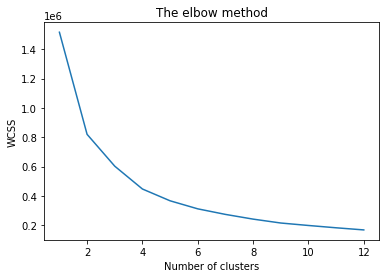

In [8]:
wcss = []

for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init =10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 13), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
#k-means++ = select initial cluster for k-means
#n_cluster= choose random observations for initial centroid
#max_iter = number of iterations for a single run
#n_init = no of times k-mean algorithm run

In [10]:
y_kmeans = kmeans.fit_predict(x)
#fitpredict method for returning each observations in cluster

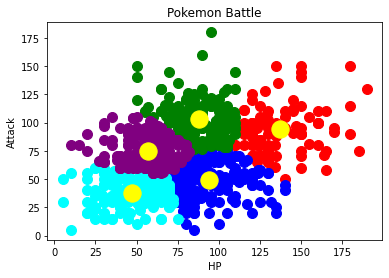

In [12]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='purple', label ='Cluster 5')
#visualisation of clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Pokemon Battle')
plt.xlabel('HP')
plt.ylabel('Attack')
plt.show()
#Plotting the centroids